In [7]:
# import Serial libraries
import serial
import serial.tools.list_ports
import time
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# list serial ports
ports = list(serial.tools.list_ports.comports())
for p in ports:
    print(p)

/dev/cu.wlan-debug - n/a
/dev/cu.Bluetooth-Incoming-Port - n/a
/dev/cu.usbserial-56230387121 - USB Single Serial


In [5]:
# read a line of data from the serial port

# open the serial port
ser = serial.Serial('/dev/cu.usbserial-56230387121', 9600, timeout=1)
encoderData = ser.readline()
encoderData = ser.readline()
encoderData = encoderData.decode()
command = "<0.0, 0.0>"
ser.write(command.encode())
ser.close()

print(encoderData)

0.844,0.000,0.321,-0.000,-1.924,0.000,



In [13]:
dt = 0.01
t_vec = np.arange(0, 10, dt)

ser = serial.Serial('/dev/cu.usbserial-56230387121', 38400, timeout=1)

linearPositions = []
linearVelocities = []
shoulderPositions = []
shoulderVelocities = []
elbowPositions = []
elbowVelocities = []

loopStart = time.time()
for t in tqdm(t_vec):
    start = time.time()
    try:
        encoderData = ser.readline()
        encoderData = ser.readline()

        command = "<0.0, 0.0>"
        ser.write(command.encode())

        encoderData = encoderData.decode()

        # parse the data
        encoderData = encoderData.split(",")
        assert(len(encoderData) == 7)

        # convert to floats first to avoid erroring out and partially apending data
        lin = float(encoderData[0])
        linVel = float(encoderData[1])
        shoulder = float(encoderData[2])
        shoulderVel = float(encoderData[3])
        elbow = float(encoderData[4])
        elbowVel = float(encoderData[5])

        linearPositions.append(lin)
        linearVelocities.append(linVel)
        shoulderPositions.append(shoulder)
        shoulderVelocities.append(shoulderVel)
        elbowPositions.append(elbow)
        elbowVelocities.append(elbowVel)

    except:
        print("Failed to read data " + str(t))
        linearPositions.append(0)
        linearVelocities.append(0)
        shoulderPositions.append(0)
        shoulderVelocities.append(0)
        elbowPositions.append(0)
        elbowVelocities.append(0)

    end = time.time()
    # print("Loop took " + str(end - start) + " seconds")
    time.sleep(max(0, dt - (end - start)))
    # time.sleep(dt)
loopEnd = time.time()
print("Loop took " + str(loopEnd - loopStart) + " seconds")


 22%|██▎       | 225/1000 [00:02<00:09, 82.70it/s]

Failed to read data 2.09


100%|██████████| 1000/1000 [00:17<00:00, 58.50it/s]

Loop took 17.095028162002563 seconds


In [14]:
print(np.shape(t_vec))
print(np.shape(linearPositions))
print(np.shape(linearVelocities))
print(np.shape(shoulderPositions))
print(np.shape(shoulderVelocities))
print(np.shape(elbowPositions))
print(np.shape(elbowVelocities))


(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)


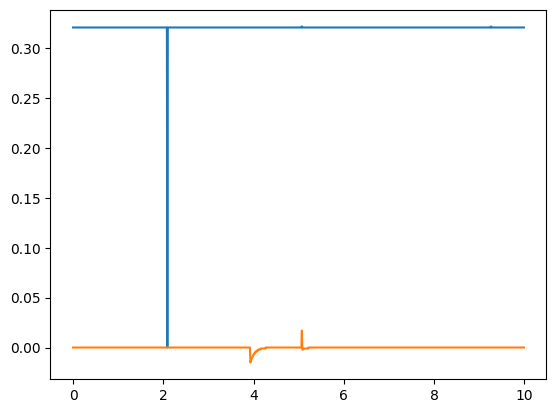

In [15]:
# plot the shoulder positions and velocities
plt.plot(t_vec, shoulderPositions, label="shoulder position")
plt.plot(t_vec, shoulderVelocities, label="shoulder velocity")